In [166]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif', weight='ultralight')
rc('figure', facecolor='w')
from mpl_toolkits.mplot3d import Axes3D
from astropy.io import fits, ascii
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import os, math
import apogee_tools as ap

/home/jess/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [153]:
match = pd.read_csv('test_results_x_GALAH.csv')
# match = match[match['gaia_dr2_id'] != 4231179820406297728]
# np.array(match.keys())

In [162]:
data = {'ID_AP':match['id'], \
        'ID_GAL':match['source_id'], \
        'PLX_AP':list(match['plx']), \
        'PLX_GAL':list(match['parallax']), \
        'DIST_AP':1/np.array(match['plx']), \
        'DIST_GAL':1/np.array(match['parallax']), \
        'TEFF_AP':list(match['teff_1']), \
        'TEFF_GAL':list(match['teff_2']), \
        'FEH_AP':list(match['fe_h_1']), \
        'FEH_GAL':list(match['fe_h_2']), \
        'ANGLE_SEP':match['separation'], \
        'PMRA_AP':match['pmra.1'], \
        'PMRA_GAL':match['pmra'], \
        'PMDEC_AP':match['pmdec.1'], \
        'PMDEC_GAL':match['pmdec'], \
        'PMRA_ERR_AP':match['pmra_err'], \
        'PMRA_ERR_GAL':match['pmra_error'], \
        'PMDEC_ERR_AP':match['pmdec_err'], \
        'PMDEC_ERR_GAL':match['pmdec_error'], \
        'PM_UNC_AP':np.sqrt(match['pmra_err'] + match['pmdec_err']**2), \
        'PM_UNC_GAL':np.sqrt(match['pmra_error'] + match['pmdec_error']**2)}

data['CPM_CRIT'] = (data['PMRA_AP'] - data['PMRA_GAL'])**2 / (data['PMRA_ERR_AP']**2 + data['PMRA_ERR_GAL']**2) + \
                (data['PMDEC_AP'] - data['PMDEC_GAL'])**2 / (data['PMDEC_ERR_AP']**2 + data['PMDEC_ERR_GAL']**2)
f = pd.DataFrame(data=data)
f

,ANGLE_SEP,CPM_CRIT,DIST_AP,DIST_GAL,FEH_AP,FEH_GAL,ID_AP,ID_GAL,PLX_AP,PLX_GAL,...,PMDEC_ERR_GAL,PMDEC_GAL,PMRA_AP,PMRA_ERR_AP,PMRA_ERR_GAL,PMRA_GAL,PM_UNC_AP,PM_UNC_GAL,TEFF_AP,TEFF_GAL
0,161.081022,5.990252e+03,0.325063,0.756695,-0.078698,-0.100525,2M16503928-0222558,4378822310505406208,3.076323,1.321537,...,0.027373,-10.834881,-9.111415,0.170255,0.040758,-12.410293,0.433051,0.203734,3577.302936,5654.265910
1,231.842489,2.387925e+05,0.078449,2.254872,-0.176811,-0.563869,2M05302578+0330277,3236019405248188032,12.747121,0.443484,...,0.084257,0.656257,55.208327,0.081527,0.093789,-1.153236,0.293464,0.317629,3649.885429,4092.581652
2,12.234998,1.367867e+04,0.185357,0.649844,0.142090,0.273299,2M16491938-0155006,4378903571286554240,5.395006,1.538830,...,0.024957,15.257505,-13.842289,0.061074,0.035960,-21.738751,0.250605,0.191266,3826.300817,5764.354590
3,42.003078,4.349357e+03,0.165277,0.665529,0.243803,-0.005883,2M16512190-0204013,4379211640699889408,6.050446,1.502564,...,0.038712,1.447771,-15.364638,0.142342,0.055958,-6.093230,0.390383,0.239701,3362.968449,6203.049322
4,53.981841,2.562396e+06,0.153817,1.059905,-0.109437,-0.166106,2M04123306-0539217,3203206507942681472,6.501241,0.943480,...,0.019964,0.488049,-31.220302,0.049630,0.035000,6.200572,0.224450,0.188144,3784.304438,5904.468591
5,1.953352,0.000000e+00,0.031362,0.031362,-0.271991,-0.632220,2M19585332+0522081,4248498915259673728,31.886113,31.886113,...,0.083012,-12.933952,138.146626,0.116606,0.116606,138.146626,0.351422,0.351422,3758.960007,4316.375977
6,107.565166,7.446497e+05,0.115084,0.629858,0.144927,0.173865,2M20381367+0013431,4231141268779506176,8.689274,1.587661,...,0.029087,-4.831606,70.486678,0.079265,0.043227,-5.179592,0.286523,0.209935,3557.916509,5542.257067
7,90.611125,1.188214e+05,0.035105,0.451628,-0.070417,-0.372976,2M16494311-0230135,4378798739724197376,28.486351,2.214213,...,0.033006,-8.666398,138.575927,0.427906,0.047424,-4.727695,0.746842,0.220258,3341.141135,5529.871047
8,141.239616,3.456559e+06,0.058388,2.052214,-0.037838,-0.155969,2M08535174+0318422,578139431681832576,17.126774,0.487279,...,0.043932,0.553169,-168.503572,0.071283,0.065664,-3.305205,0.271225,0.259989,3495.686670,4867.415280
9,275.699175,9.751380e+04,0.239183,0.769830,-0.030764,-0.439912,2M18443934-3002378,4047232826452492672,4.180891,1.298988,...,0.070488,1.983448,-17.435802,0.078991,0.077595,6.093222,0.290200,0.287338,3865.847613,7121.392816


In [1]:
f[f['CPM_CRIT'] < 25]

NameError: name 'f' is not defined

5     2M19585332+0522081
11    2M20400380+0037405
18    2M04305859+0037392
Name: ID_AP, dtype: object

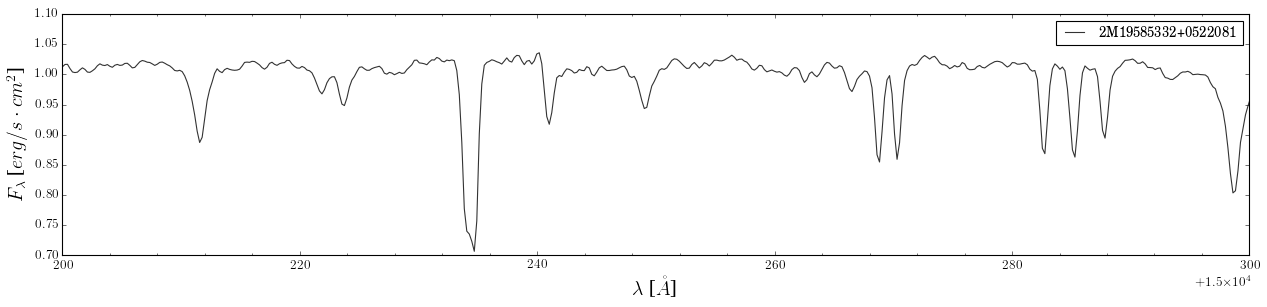

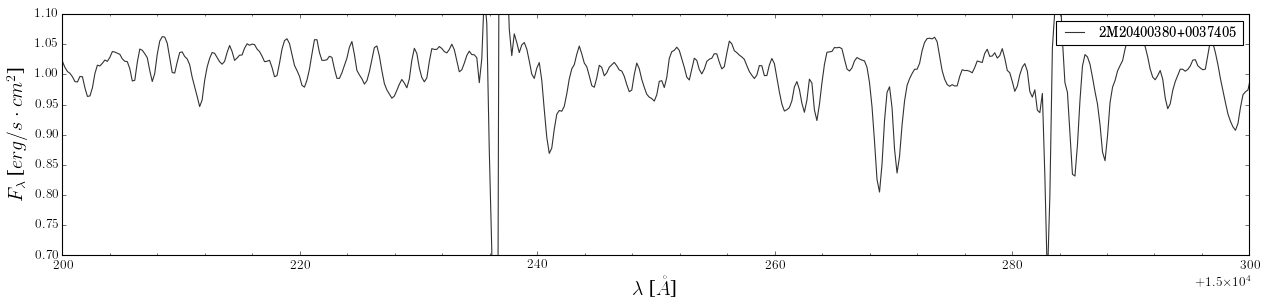

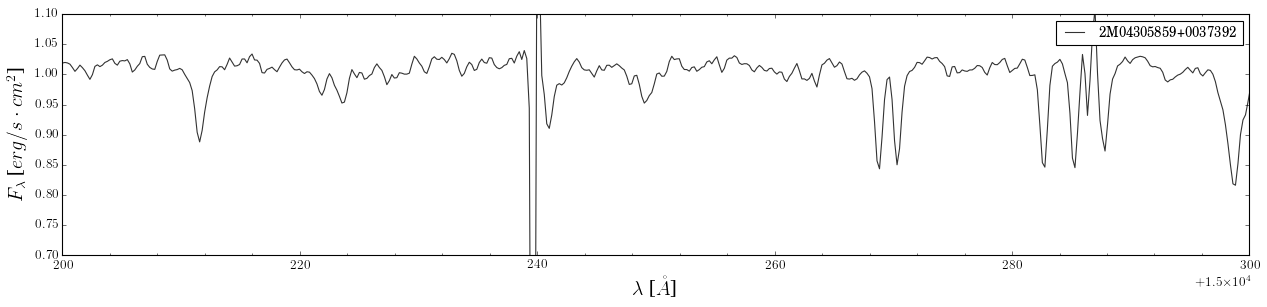

In [173]:
for ID in f[f['CPM_CRIT'] < 25]['ID_AP']:
    sp = ap.Apogee(id=ID, type='aspcap')
    sp.plot(xrange=[15200,15300], yrange=[.7,1.1])

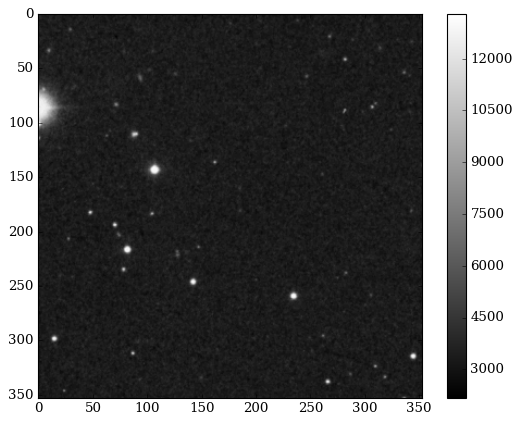

In [114]:
image_data = fits.getdata('/home/jess/Desktop/Research/comoving_pairs/mystar06z6.fits')
plt.imshow(image_data, cmap='gray')
plt.colorbar()